## EDA & Feature Engineering

### Initial Exploration

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Load data
df = pd.read_csv("../data/raw/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Check missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


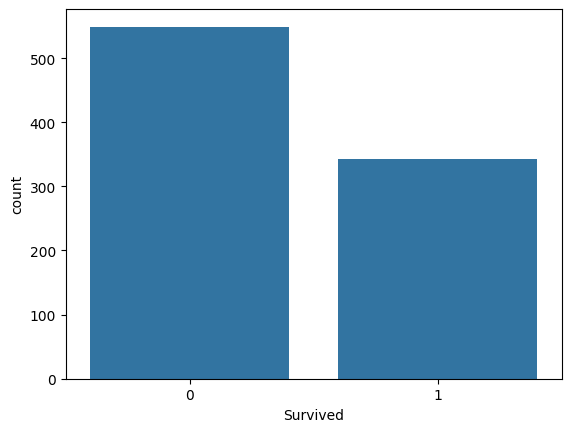

In [7]:
# Basic visualizations
sns.countplot(x="Survived", data=df)
plt.show()

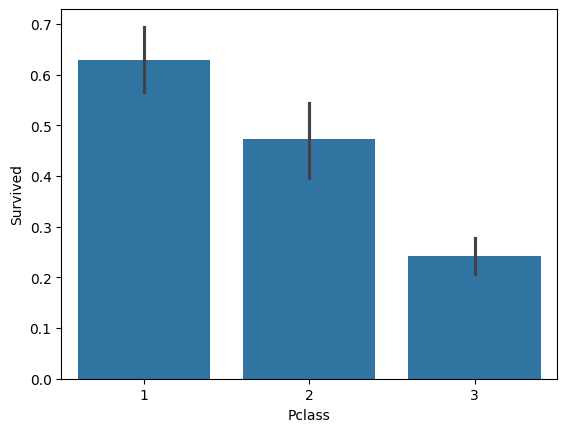

In [8]:
sns.barplot(x="Pclass", y="Survived", data=df)
plt.show()

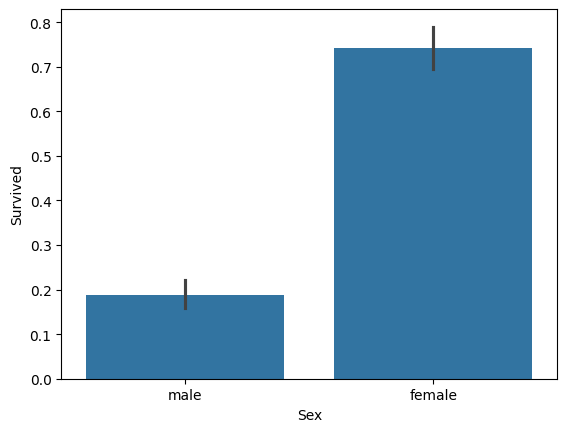

In [9]:
sns.barplot(x="Sex", y="Survived", data=df)
plt.show()

### Simple Feature Engineering

In [10]:
# Extract Title from Name
df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.')
df['Title'] = df['Title'].replace(['Mlle','Ms'],'Miss').replace('Mme','Mrs')

In [12]:
# Fill missing Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

In [14]:
# Fill missing Embarked
df['Embarked'] = df['Embarked'].fillna('S')

In [15]:
# Encode categorical features
df = pd.get_dummies(df, columns=['Sex','Embarked','Title'], drop_first=True)

In [16]:
# Select features
features = ['Pclass','Age','SibSp','Parch','Fare','Sex_male','Embarked_Q','Embarked_S','Title_Mr','Title_Mrs','Title_Miss']
X = df[features]
y = df['Survived']

### Train a Linear Regression Model

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import joblib

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 0.13938134889198184


In [29]:
# Save model
joblib.dump(model, "../../backend/app/ml/model.joblib")

['../../backend/app/ml/model.joblib']